#**Proyecto en la empresa retail**

Nicole Stefanie Caro Rodriguez - Daniel Alfonso Lopez Sierra

In [442]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, Normalizer
from sklearn.impute import KNNImputer


In [443]:
dm = pd.read_csv("/content/datos_marketing.csv")

### **Exploración** **inicial**

In [444]:
dm.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,8,10,4,no,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,1,1,2,no,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,8,2,10,no,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,0,4,no,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,3,6,no,0


In [445]:
dm.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,42,118,247,9,3,4,no,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,0,0,8,8,2,5,no,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,32,12,24,2,3,13,no,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,214,80,30,61,6,5,10,no,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,84,3,61,2,1,21,3,1,4,no,0


In [446]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [447]:
dm.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'Complain', 'AcceptedCmps'],
      dtype='object')

In [448]:
dm.columns = dm.columns.str.lower()   #pasar todo a minuscula

In [449]:
dm.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'complain', 'acceptedcmps'],
      dtype='object')

In [450]:
dm.index

RangeIndex(start=0, stop=2240, step=1)

In [451]:
dm.shape

(2240, 19)

**Revisar las variables de tipo object**

In [452]:
dm.loc[0:10, 'education']

0     Graduation
1     Graduation
2     Graduation
3     Graduation
4            PhD
5         Master
6     Graduation
7            PhD
8            PhD
9            PhD
10    Graduation
Name: education, dtype: object

In [453]:
dm.loc[0:10, 'marital_status']

0       Single
1       Single
2     Together
3     Together
4      Married
5     Together
6     Divorced
7      Married
8     Together
9     Together
10     Married
Name: marital_status, dtype: object

In [454]:
dm.loc[0:10, 'dt_customer']

0     04-09-2012
1     08-03-2014
2     21-08-2013
3     10-02-2014
4     19-01-2014
5     09-09-2013
6     13-11-2012
7     08-05-2013
8     06-06-2013
9     13-03-2014
10    15-11-2013
Name: dt_customer, dtype: object

In [455]:
dm.loc[0:10, 'complain']

0     no
1     no
2     no
3     no
4     no
5     no
6     no
7     no
8     no
9     no
10    no
Name: complain, dtype: object

**Revisar la variable float64**

In [456]:
dm.loc[0:10, 'income']

0     58138.0
1     46344.0
2     71613.0
3     26646.0
4     58293.0
5     62513.0
6     55635.0
7     33454.0
8     30351.0
9      5648.0
10        NaN
Name: income, dtype: float64

###**Revisar si hay datos faltantes**

In [457]:
dm.isna().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
complain                0
acceptedcmps            0
dtype: int64

In [458]:
datos1 = dm.groupby(['education', 'marital_status']) ['income'].transform('median')
datos1

0       49973.5
1       49973.5
2       53977.0
3       53977.0
4       57081.5
         ...   
2235    50737.0
2236    56756.0
2237    55635.0
2238    49736.0
2239    57081.5
Name: income, Length: 2240, dtype: float64

In [459]:
dm['income'].fillna(datos1,inplace=True)

In [460]:
dm.isna().sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
complain               0
acceptedcmps           0
dtype: int64

In [461]:
dm.duplicated().sum()

0

In [462]:
d_atipico = 	666666.0
dm['income'] = dm['income'].replace(d_atipico, np.nan)

# Conocer las columnas

In [463]:
dm['education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: education, Length: 2240, dtype: object

In [464]:
dm['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [465]:
dm[['education', 'marital_status']]


,education,marital_status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [466]:
dm[['education', 'income']]

,education,income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
4,PhD,58293.0
...,...,...
2235,Graduation,61223.0
2236,PhD,64014.0
2237,Graduation,56981.0
2238,Master,69245.0


In [467]:
dm.loc[dm['education'] == 'Graduation', ['education','marital_status']]

,education,marital_status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
6,Graduation,Divorced
...,...,...
2232,Graduation,Single
2233,Graduation,Together
2234,Graduation,Married
2235,Graduation,Married


In [468]:
dm.loc[dm['education'] == 'Master', ['education','marital_status']]

,education,marital_status
5,Master,Together
13,Master,Divorced
18,Master,Married
30,Master,Divorced
31,Master,Together
...,...,...
2219,Master,Together
2221,Master,Single
2223,Master,Married
2231,Master,Single


In [469]:
dm.loc[dm['education'] == 'PhD', ['education','marital_status']]

,education,marital_status
4,PhD,Married
7,PhD,Married
8,PhD,Together
9,PhD,Together
15,PhD,Single
...,...,...
2202,PhD,YOLO
2217,PhD,Widow
2224,PhD,Single
2236,PhD,Together


In [470]:
dm.loc[dm['marital_status'] == 'Married', ['marital_status','education']]

,marital_status,education
4,Married,PhD
7,Married,PhD
10,Married,Graduation
11,Married,Basic
14,Married,Graduation
...,...,...
2226,Married,Graduation
2229,Married,Graduation
2234,Married,Graduation
2235,Married,Graduation


In [471]:
dm.loc[dm['marital_status'] == 'YOLO', ['marital_status','education']]

,marital_status,education
2177,YOLO,PhD
2202,YOLO,PhD


In [472]:
dm[['education', 'mntwines','mntfruits', 'mntmeatproducts','mntfishproducts', 'mntsweetproducts', 'mntgoldprods']]

,education,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
0,Graduation,635,88,546,172,88,88
1,Graduation,11,1,6,2,1,6
2,Graduation,426,49,127,111,21,42
3,Graduation,11,4,20,10,3,5
4,PhD,173,43,118,46,27,15
...,...,...,...,...,...,...,...
2235,Graduation,709,43,182,42,118,247
2236,PhD,406,0,30,0,0,8
2237,Graduation,908,48,217,32,12,24
2238,Master,428,30,214,80,30,61


In [473]:
dm.loc[dm['education'] == 'PhD', ['education', 'mntwines','mntfruits', 'mntmeatproducts','mntfishproducts', 'mntsweetproducts', 'mntgoldprods']]

,education,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
4,PhD,173,43,118,46,27,15
7,PhD,76,10,56,3,1,23
8,PhD,14,0,24,3,3,2
9,PhD,28,0,6,1,1,13
15,PhD,1006,22,115,59,68,45
...,...,...,...,...,...,...,...
2202,PhD,322,3,50,4,3,42
2217,PhD,332,194,377,149,125,57
2224,PhD,580,6,58,8,0,27
2236,PhD,406,0,30,0,0,8


In [474]:
dm.loc[dm['education'] == 'Graduation', ['education', 'complain']]

,education,complain
0,Graduation,no
1,Graduation,no
2,Graduation,no
3,Graduation,no
6,Graduation,no
...,...,...
2232,Graduation,no
2233,Graduation,no
2234,Graduation,no
2235,Graduation,no


##**Crear columna de edad**

In [475]:
dm['edad'] = 2023 - dm['year_birth']
dm

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps,edad
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,8,10,4,no,0,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,1,1,2,no,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,8,2,10,no,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,0,4,no,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,3,6,no,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,42,118,247,9,3,4,no,0,56
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,0,0,8,8,2,5,no,1,77
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,32,12,24,2,3,13,no,1,42
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,214,80,30,61,6,5,10,no,0,67


In [476]:
dm['edad'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: edad, dtype: float64

###**Presencia de datos atipicos**

In [477]:
def function3(row):
    edad = row['edad']
    return edad < 100
dm = dm[dm.apply(function3, axis=1)]


In [478]:
dm['edad'].describe()

count    2237.000000
mean       54.098346
std        11.701917
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: edad, dtype: float64

In [479]:
q1 = dm['income'].quantile(.25)
q3 = dm['income'].quantile(.75)
IQR = q3 - q1
lim_sup = q3 + 1.5 * IQR
lim_inf = q1 - 1.5 * IQR

dm = dm[(dm['income'] >= lim_inf) & (dm['income'] <= lim_sup)]
dm['income'].describe()

count      2229.000000
mean      51613.359354
std       20603.364837
min        1730.000000
25%       35416.000000
50%       51111.000000
75%       68118.000000
max      113734.000000
Name: income, dtype: float64

In [480]:
q1 = dm['edad'].quantile(.25)
q3 = dm['edad'].quantile(.75)
IQR = q3 - q1
lim_sup = q3 + 1.5 * IQR
lim_inf = q1 - 1.5 * IQR

dm = dm[(dm['edad'] >= lim_inf) & (dm['edad'] <= lim_sup)]
dm['edad'].describe()

count    2229.000000
mean       54.111261
std        11.707430
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: edad, dtype: float64

##**Cambiar a variable dummy la variable complain**

In [481]:
dm['complain'].unique()

array(['no', 'yes'], dtype=object)

In [482]:
c1 = {'yes': 1,'no': 0}

dm['complain'] = dm['complain'].map(c1)
dm['complain'].unique()

array([0, 1])

In [483]:
dm

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps,edad
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,8,10,4,0,0,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,1,1,2,0,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,8,2,10,0,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,0,4,0,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,3,6,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,42,118,247,9,3,4,0,0,56
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,0,0,8,8,2,5,0,1,77
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,32,12,24,2,3,13,0,1,42
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,214,80,30,61,6,5,10,0,0,67


##**Categorizar la edad**

In [484]:
def function2(row):
  edad = row['edad']
  if edad <= 35:
    return 'adulto joven'
  elif edad <= 53:
    return 'adulto'
  else:
    return 'adulto mayor'

dm['cat_edad'] = dm.apply(function2, axis=1)
dm

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,mntwines,mntfruits,...,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps,edad,cat_edad
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,...,172,88,88,8,10,4,0,0,66,adulto mayor
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,...,2,1,6,1,1,2,0,0,69,adulto mayor
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,...,111,21,42,8,2,10,0,0,58,adulto mayor
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,...,10,3,5,2,0,4,0,0,39,adulto
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,...,46,27,15,5,3,6,0,0,42,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,...,42,118,247,9,3,4,0,0,56,adulto mayor
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,...,0,0,8,8,2,5,0,1,77,adulto mayor
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,...,32,12,24,2,3,13,0,1,42,adulto
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,...,80,30,61,6,5,10,0,0,67,adulto mayor


In [485]:
dm['cat_edad'].describe()

count             2229
unique               3
top       adulto mayor
freq              1072
Name: cat_edad, dtype: object

##**Modificar el formato de fecha**

In [486]:
dm['dt_customer'] = pd.to_datetime(dm['dt_customer'], format='%d-%m-%Y')

In [487]:
##Extraer el año en el que se convirtio en cliente
dm['y_customer'] = dm['dt_customer'].dt.year
dm

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,mntwines,mntfruits,...,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps,edad,cat_edad,y_customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,635,88,...,88,88,8,10,4,0,0,66,adulto mayor,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,11,1,...,1,6,1,1,2,0,0,69,adulto mayor,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,...,21,42,8,2,10,0,0,58,adulto mayor,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,11,4,...,3,5,2,0,4,0,0,39,adulto,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,...,27,15,5,3,6,0,0,42,adulto,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,709,43,...,118,247,9,3,4,0,0,56,adulto mayor,2013
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,406,0,...,0,8,8,2,5,0,1,77,adulto mayor,2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,908,48,...,12,24,2,3,13,0,1,42,adulto,2014
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,428,30,...,30,61,6,5,10,0,0,67,adulto mayor,2014


##**Crear columna para total de compras realizadas**

In [488]:
dm['t_compras'] = dm['numwebpurchases'] + dm['numcatalogpurchases'] + dm['numstorepurchases']
dm

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,mntwines,mntfruits,...,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps,edad,cat_edad,y_customer,t_compras
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,635,88,...,88,8,10,4,0,0,66,adulto mayor,2012,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,11,1,...,6,1,1,2,0,0,69,adulto mayor,2014,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,...,42,8,2,10,0,0,58,adulto mayor,2013,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,11,4,...,5,2,0,4,0,0,39,adulto,2014,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,...,15,5,3,6,0,0,42,adulto,2014,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,709,43,...,247,9,3,4,0,0,56,adulto mayor,2013,16
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,406,0,...,8,8,2,5,0,1,77,adulto mayor,2014,15
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,908,48,...,24,2,3,13,0,1,42,adulto,2014,18
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,428,30,...,61,6,5,10,0,0,67,adulto mayor,2014,21


##**Categorizar el ingreso**

In [489]:
dm['c_income'] = pd.cut(dm['income'], 4, labels=['muy bajo', 'bajo', 'medio', 'alto'])
dm

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,mntwines,mntfruits,...,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps,edad,cat_edad,y_customer,t_compras,c_income
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,635,88,...,8,10,4,0,0,66,adulto mayor,2012,22,medio
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,11,1,...,1,1,2,0,0,69,adulto mayor,2014,4,bajo
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,...,8,2,10,0,0,58,adulto mayor,2013,20,medio
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,11,4,...,2,0,4,0,0,39,adulto,2014,6,muy bajo
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,...,5,3,6,0,0,42,adulto,2014,14,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,709,43,...,9,3,4,0,0,56,adulto mayor,2013,16,medio
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,406,0,...,8,2,5,0,1,77,adulto mayor,2014,15,medio
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,908,48,...,2,3,13,0,1,42,adulto,2014,18,bajo
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,428,30,...,6,5,10,0,0,67,adulto mayor,2014,21,medio


##**Eliminar columnas**

In [490]:
dm.drop(columns=['year_birth', 'dt_customer', 'id'], inplace=True)
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   education            2229 non-null   object  
 1   marital_status       2229 non-null   object  
 2   income               2229 non-null   float64 
 3   kidhome              2229 non-null   int64   
 4   teenhome             2229 non-null   int64   
 5   mntwines             2229 non-null   int64   
 6   mntfruits            2229 non-null   int64   
 7   mntmeatproducts      2229 non-null   int64   
 8   mntfishproducts      2229 non-null   int64   
 9   mntsweetproducts     2229 non-null   int64   
 10  mntgoldprods         2229 non-null   int64   
 11  numwebpurchases      2229 non-null   int64   
 12  numcatalogpurchases  2229 non-null   int64   
 13  numstorepurchases    2229 non-null   int64   
 14  complain             2229 non-null   int64   
 15  acceptedcmps         

###**Exploración estadística**

In [491]:
dm.describe()

,income,kidhome,teenhome,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps,edad,y_customer,t_compras
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,51613.359354,0.444594,0.507402,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,4.100045,2.636608,5.812472,0.008973,0.298789,54.111261,2013.027367,12.549125
std,20603.364837,0.538636,0.544735,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,2.775461,2.796161,3.242144,0.094319,0.679597,11.707430,0.684966,7.181785
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,2012.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.000000,0.000000,46.000000,2013.000000,6.000000
50%,51111.000000,0.000000,0.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,0.000000,0.000000,53.000000,2013.000000,12.000000
75%,68118.000000,1.000000,1.000000,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000,6.000000,4.000000,8.000000,0.000000,0.000000,64.000000,2013.000000,18.000000
max,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,1.000000,4.000000,83.000000,2014.000000,32.000000


In [492]:
dm[dm.select_dtypes("category").columns].describe()

,c_income
count,2229
unique,4
top,bajo
freq,965


In [493]:
dm['income'].mean()

51613.35935397039

In [494]:
dm['income'].median()

51111.0

In [495]:
dm['cat_edad'].unique()

array(['adulto mayor', 'adulto', 'adulto joven'], dtype=object)

In [496]:
dm['cat_edad'].nunique()

3

### Agrupar y ordenar

In [497]:
dm.groupby(['cat_edad', 'marital_status']).agg({"max"})

education    income kidhome teenhome mntwines  \
                                    max       max     max      max      max   
cat_edad     marital_status                                                   
adulto       Alone                  PhD   35860.0       1        1       15   
             Divorced               PhD  102692.0       2        1     1126   
             Married                PhD   96547.0       2        2     1486   
             Single                 PhD  101970.0       2        2     1302   
             Together               PhD  105471.0       2        2     1396   
             Widow                  PhD   66731.0       1        1      595   
             YOLO                   PhD   48432.0       0        1      322   
adulto joven Absurd          Graduation   79244.0       0        0      471   
             Alone           Graduation   34176.0       1        0        5   
             Divorced            Master   35388.0       1        0        8   
             Married                PhD   87000.0       1        0      864   
             Single                 PhD   96843.0       1        0     1332   
             Together               PhD   89891.0       1        0     1259   
adulto mayor Absurd              Master   65487.0       0        0      240   
             Alone               Master   61331.0       1        1      534   
             Divorced               PhD   87305.0       2        2     1459   
             Married                PhD   94871.0       2        2     1493   
             Single                 PhD  113734.0       2        2     1324   
             Together               PhD   94384.0       2        2     1492   
             Widow                  PhD   85620.0       1        2     1462   

                            mntfruits mntmeatproducts mntfishproducts  \
                                  max             max             max   
cat_edad     marital_status                                             
adulto       Alone                  0               8               4   
             Divorced             161             850             216   
             Married              197            1725             254   
             Single               199             961             234   
             Together             185            1607             258   
             Widow                159             213             120   
             YOLO                   3              50               4   
adulto joven Absurd               102             125             212   
             Alone                  7              24              19   
             Divorced               4              10               4   
             Married              153             768             218   
             Single               185             951             250   
             Together             172             815             147   
adulto mayor Absurd                67             500             199   
             Alone                  5              47               0   
             Divorced             172             932             225   
             Married              194             981             253   
             Single               190             984             240   
             Together             183             946             246   
             Widow                194             925             259   

                            mntsweetproducts mntgoldprods numwebpurchases  \
                                         max          max             max   
cat_edad     marital_status                                                 
adulto       Alone                         2           20               1   
             Divorced                    189          242              11   
             Married                     197          241              11   
             Single                      263          362             

#**Cambiar las opciones Absurd, Alone y YOLO**

In [498]:
old_value = "Alone"
new_value = "Single"
dm['marital_status'] = dm['marital_status'].replace(old_value, new_value)

In [499]:
old_value = "Together"
new_value = "Married"
dm['marital_status'] = dm['marital_status'].replace(old_value, new_value)

In [500]:
old_value = "YOLO"
new_value = "Single"
dm['marital_status'] = dm['marital_status'].replace(old_value, new_value)

In [501]:
old_value = "Absurd"
new_value = "Single"
dm['marital_status'] = dm['marital_status'].replace(old_value, new_value)

###**Segmentación**

In [502]:
# pivot tables
dm.pivot_table(index=['cat_edad'], values=["mntwines", "mntfruits", "mntmeatproducts", "mntfishproducts", "mntsweetproducts", "mntgoldprods"], aggfunc='mean')

,mntfishproducts,mntfruits,mntgoldprods,mntmeatproducts,mntsweetproducts,mntwines
cat_edad,,,,,,
adulto,34.481196,24.157184,39.385728,145.920926,25.815815,251.199614
adulto joven,46.600000,36.158333,50.008333,242.308333,33.375000,294.150000
adulto mayor,39.697761,27.370336,48.026119,175.392724,27.767724,358.240672


In [503]:
from statistics import mode

In [504]:
dm.pivot_table(index=['cat_edad', 'education'], values=['numwebpurchases',"numcatalogpurchases","numstorepurchases"], aggfunc=mode)

numcatalogpurchases  numstorepurchases  \
cat_edad     education                                            
adulto       2n Cycle                      0                  3   
             Basic                         0                  3   
             Graduation                    0                  3   
             Master                        0                  3   
             PhD                           0                  3   
adulto joven 2n Cycle                      1                  4   
             Basic                         0                  2   
             Graduation                    0                  4   
             Master                        4                 10   
             PhD                          10                  5   
adulto mayor 2n Cycle                      1                  3   
             Basic                         0                  3   
             Graduation                    1                  3   
             Master                        1                  3   
             PhD                           0                  4   

                         numwebpurchases  
cat_edad     education                    
adulto       2n Cycle                  2  
             Basic                     1  
             Graduation                2  
             Master                    3  
             PhD                       1  
adulto joven 2n Cycle                  3  
             Basic                     1  
             Graduation                1  
             Master                    3  
             PhD                       4  
adulto mayor 2n Cycle                  3  
             Basic                     2  
             Graduation                4  
             Master                    3  
             PhD                       2

<Axes: ylabel='cat_edad-education'>

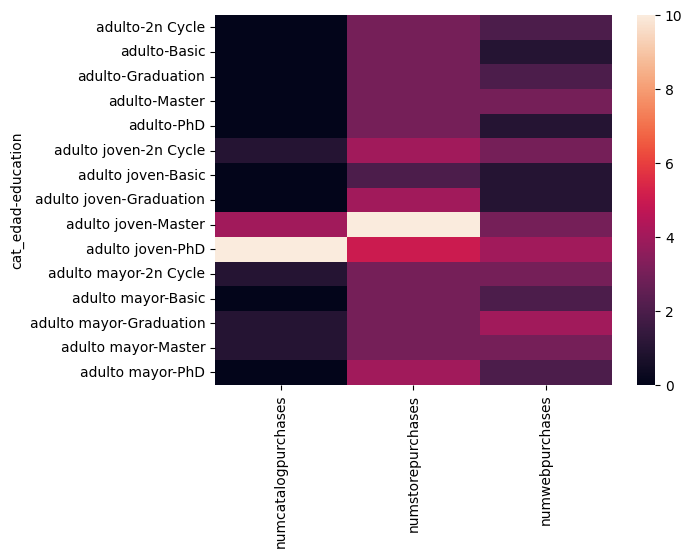

In [505]:
sns.heatmap(dm.pivot_table(index=['cat_edad', 'education'], values=['numwebpurchases',"numcatalogpurchases","numstorepurchases"], aggfunc=mode))

### **Tipos de datos**

In [506]:
# cambiar tipo de datos
dm['education'] = dm['education'].astype('category')
dm['marital_status'] = dm['marital_status'].astype('category')
dm['cat_edad'] = dm['cat_edad'].astype('category')
dm['c_income'] = dm['c_income'].astype('category')
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   education            2229 non-null   category
 1   marital_status       2229 non-null   category
 2   income               2229 non-null   float64 
 3   kidhome              2229 non-null   int64   
 4   teenhome             2229 non-null   int64   
 5   mntwines             2229 non-null   int64   
 6   mntfruits            2229 non-null   int64   
 7   mntmeatproducts      2229 non-null   int64   
 8   mntfishproducts      2229 non-null   int64   
 9   mntsweetproducts     2229 non-null   int64   
 10  mntgoldprods         2229 non-null   int64   
 11  numwebpurchases      2229 non-null   int64   
 12  numcatalogpurchases  2229 non-null   int64   
 13  numstorepurchases    2229 non-null   int64   
 14  complain             2229 non-null   int64   
 15  acceptedcmps         

###**Graficos**

<Axes: >

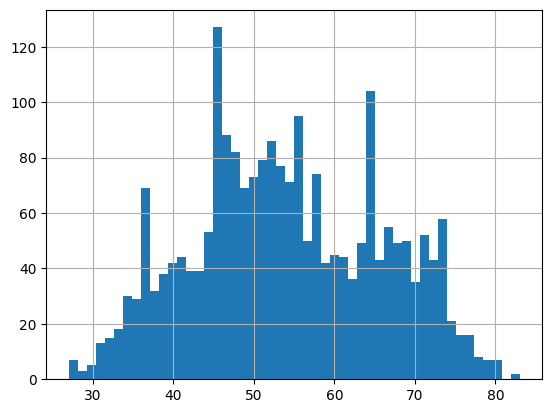

In [507]:
dm['edad'].hist(bins=50)

<Axes: >

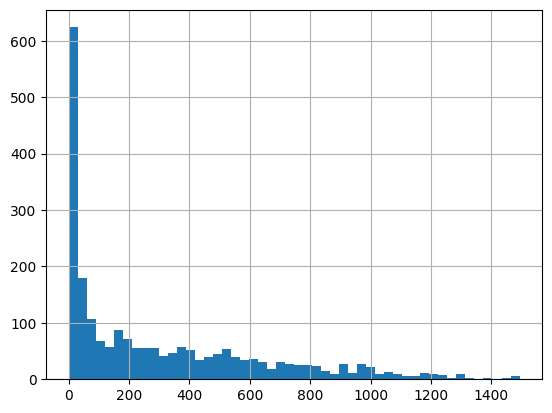

In [508]:
dm['mntwines'].hist(bins=50)

<Axes: >

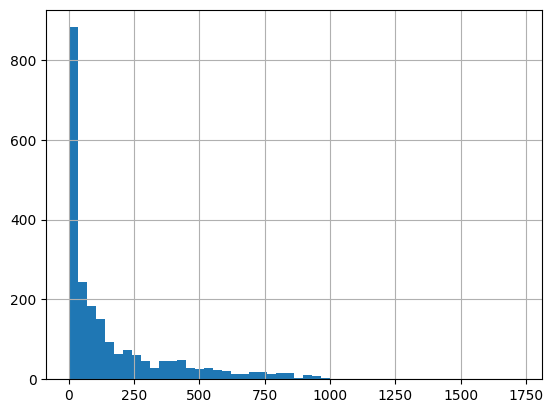

In [509]:
dm['mntmeatproducts'].hist(bins=50)

###**Analisis de compras por los clientes**

<ipython-input-510-1589b8cec0d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dm.corr(method="spearman"))


<Axes: >

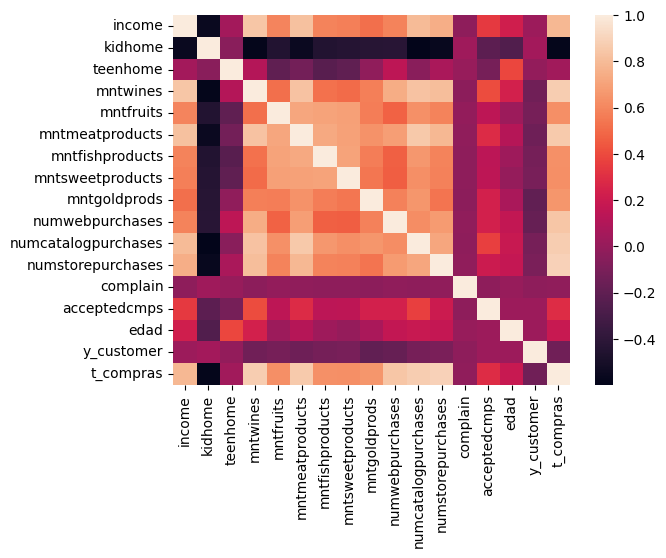

In [510]:
sns.heatmap(dm.corr(method="spearman"))

In [511]:
correlacion = dm.corr()

print(correlacion)

                       income   kidhome  teenhome  mntwines  mntfruits  \
income               1.000000 -0.527134  0.042403  0.728296   0.535403   
kidhome             -0.527134  1.000000 -0.036461 -0.498230  -0.373563   
teenhome             0.042403 -0.036461  1.000000  0.003899  -0.177128   
mntwines             0.728296 -0.498230  0.003899  1.000000   0.387591   
mntfruits            0.535403 -0.373563 -0.177128  0.387591   1.000000   
mntmeatproducts      0.692968 -0.443248 -0.267046  0.586156   0.562744   
mntfishproducts      0.550066 -0.388645 -0.205301  0.398024   0.593941   
mntsweetproducts     0.549662 -0.371720 -0.163651  0.384885   0.566545   
mntgoldprods         0.412355 -0.351059 -0.021478  0.384979   0.389145   
numwebpurchases      0.493776 -0.365123  0.154624  0.540786   0.295507   
numcatalogpurchases  0.706876 -0.517305 -0.111976  0.673390   0.515184   
numstorepurchases    0.683867 -0.504817  0.048310  0.641490   0.462344   
complain            -0.027443  0.03629

<ipython-input-511-74d58491fcc3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = dm.corr()


In [512]:
compras = ["mntwines", "mntfruits", "mntmeatproducts", "mntfishproducts", "mntsweetproducts", "mntgoldprods"]
descripcion = dm[compras].describe()
print(descripcion)

          mntwines    mntfruits  mntmeatproducts  mntfishproducts  \
count  2229.000000  2229.000000      2229.000000      2229.000000   
mean    304.991476    26.348587       165.283984        37.642441   
std     336.761943    39.764060       219.336589        54.700548   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     176.000000     8.000000        67.000000        12.000000   
75%     505.000000    33.000000       231.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       mntsweetproducts  mntgoldprods  
count       2229.000000   2229.000000  
mean          27.161507     44.113055  
std           41.338945     52.091255  
min            0.000000      0.000000  
25%            1.000000      9.000000  
50%            8.000000     24.000000  
75%           34.000000     56.000000  
max          263.000000    362.000000  


<Axes: ylabel='cat_edad-education'>

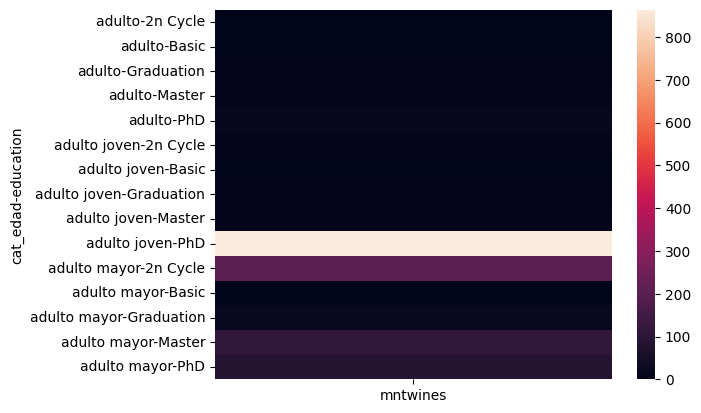

In [513]:
sns.heatmap(dm.pivot_table(index=['cat_edad', 'education'], values='mntwines', aggfunc=mode))

<Axes: ylabel='cat_edad'>

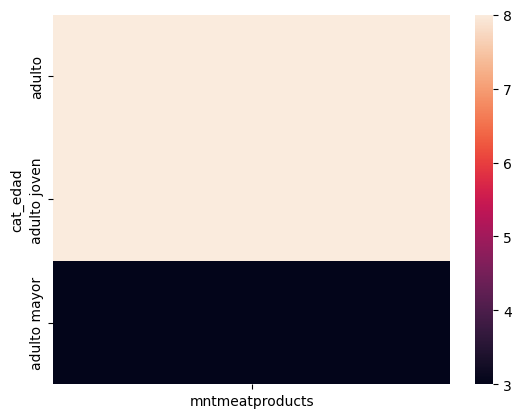

In [514]:
sns.heatmap(dm.pivot_table(index=['cat_edad'], values=['mntmeatproducts'], aggfunc=mode))

<Axes: ylabel='cat_edad'>

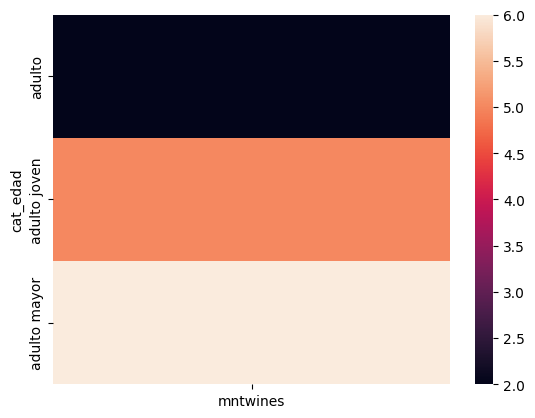

In [515]:
sns.heatmap(dm.pivot_table(index=['cat_edad'], values=['mntwines'], aggfunc=mode))

<Axes: ylabel='education'>

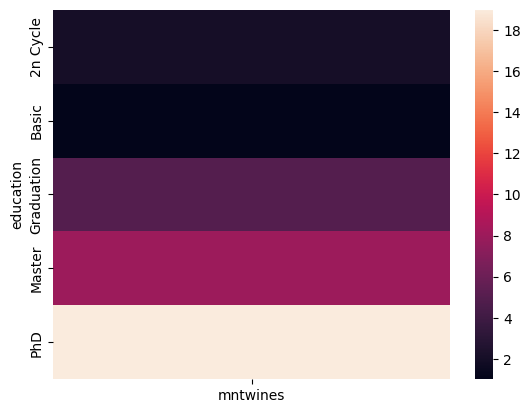

In [516]:
sns.heatmap(dm.pivot_table(index=['education'], values=['mntwines'], aggfunc=mode))

<Axes: ylabel='education'>

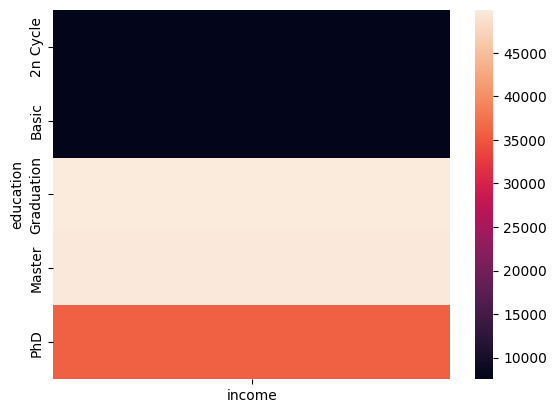

In [517]:
sns.heatmap(dm.pivot_table(index=['education'], values=['income'], aggfunc=mode))

(array([1124.,    0.,    0.,    0.,    0.,  481.,    0.,    0.,    0.,
           0.,  369.,    0.,    0.,    0.,    0.,   54.,    0.,    0.,
           0.,  201.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 20 artists>)

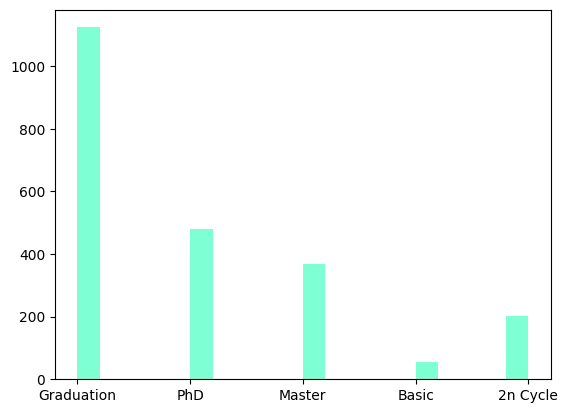

In [518]:
plt.hist(dm['education'], bins=20, color= 'aquamarine')

(array([2209.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,   20.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

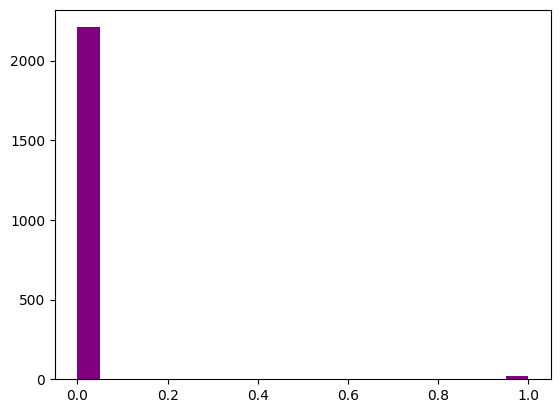

In [519]:
plt.hist(dm['complain'], bins=20, color= 'purple')


Después de una exhaustiva búsqueda en los datos podemos determinar que:

Las compras con catálogo es el medio menos popular  por parte de los clientes, pero vemos una preferencia en compra por parte de los adultos jóvenes con PhD, las comprar en la tienda las realizan cualquier persona sin importar su edad y el grado de estudio, pero se ve que hay una preferencia de compra por parte de los adultos jóvenes con Master, mientras que en las compras por página web vemos que sorpresivamente que el adulto y el adulto joven son los que menos utilizan este medio y los adultos mayores comprar más por pagina web

Por otra parte, analizando las compras de licores, edad y el nivel de estudio observamos que los adultos jóvenes con PhD tienden a gastar mucho más en licores, mientras que los adultos y adultos jóvenes con menos grados de escolaridad casi no adquieren este tipo de productos

Analizando los productos de carne y la edad vemos una brecha en el consumo, por un lado hay una gran cantidad de clientes categorizados como adultos mayores que consumen muy poca carne y por otro lado están los adultos jóvenes y adultos los cuales tienen un consumo elevado de carne

Analizando el consumo de licores y la categoría de edad hay un visible consumo de vino por parte de los adultos mayores , el adulto joven tiene un poco menos de consumo, mientras que los adultos no consumen tanto licores

Adicional, analizando el nivel de escolaridad y el gasto en licores se aprecia que entre mayor se el nivel de escolaridad mayor será el consumo de licores al momento de ver la variable de educación y el ingreso podemos deducir que las personas que tienen un Master o están graduados ganan más de 45000 al año, los que poseen un PhD entre 35000 y 40000 y los que menos ganan son los de Básica y secundaria ganando menos de 10000

Las recomendaciones que damos a la empresa son:

Dado que los adultos jóvenes con PhD tienden a gastar más en licores, se podrían considerar ofrecer promociones especiales en productos relacionados con los licores, como degustaciones exclusivas o descuentos en selecciones premium. Esto podría atraer a este grupo demográfico y aumentar las ventas en esa categoría.

A pesar de que los adultos y adultos jóvenes utilizan menos las compras por página web, se podrían implementar estrategias para fomentar esta modalidad de compra. Ofrecer descuentos exclusivos en línea, programas de fidelización o la posibilidad de comprar en línea y recoger en la tienda, pues podrían ser incentivos efectivos para atraer a estos grupos y aumentar las ventas en línea.

Dado que los adultos jóvenes y adultos tienen un consumo elevado de carne, se podrían explorar la posibilidad de diversificar tu catálogo de productos de carne. Ofrecer cortes exclusivos, productos de origen local o opciones de carne preparadas de manera especial podría atraer aún más a estos grupos y aumentar las ventas de carne.

Se podría segmentar las campañas de marketing en función del nivel de escolaridad de los clientes. Ofrecer productos y promociones específicas para clientes con títulos de grado, máster o PhD. Esto podría aumentar la relevancia de las ofertas y mejorar la retención de estos clientes.

Dado que los adultos mayores tienen un alto consumo de licores, se podría implementar un programa de lealtad exclusivo para ellos. Ofrecer descuentos, eventos de degustación o entregas a domicilio de licores de alta calidad para fomentar la fidelidad de este grupo.
